In [1]:
#import package
import pandas as pd
import numpy as np
import matplotlib as mp
import scipy as sp
import sklearn as sk
from matplotlib import pyplot as plt

In [2]:
#read data include job posting,coivd-19(national),covid-19(city)  
data_path_job = r"D:\BaiduNetdiskDownload\长风网\人才需求数据\招聘数据02.csv"
data_path_covid = r"D:\BaiduNetdiskDownload\长风网\新冠疫情数据集\疫情数据1\全国疫情数据\COVID-19.9.13\数据2\全国\整理后数据\全国新冠状肺炎数据.xls"
data_path_covid_city = r"D:\BaiduNetdiskDownload\长风网\新冠疫情数据集\疫情数据1\分城市疫情数据\CityTS.7.3.xlsx"

df_j = pd.read_csv(data_path_job)
df_c = pd.read_excel(data_path_covid)
df_cc = pd.read_excel(data_path_covid_city)

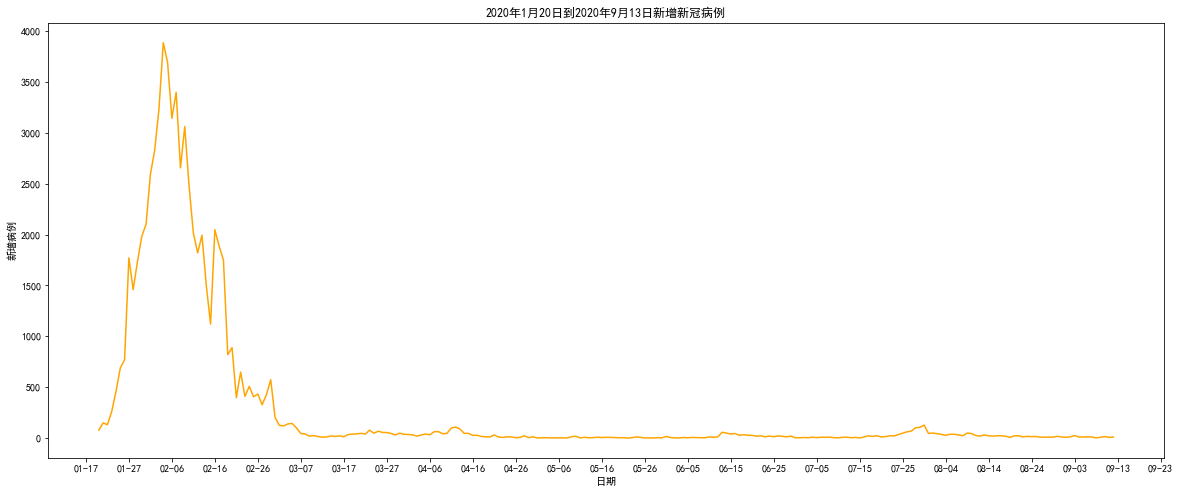

In [3]:
# 全国新增的人数和日期
from pandas import to_datetime
import matplotlib.dates as mdates
df_nn = df_c.iloc[0:237:,0:2]
df_nn.columns = ["Date","new_case"]

fig = plt.figure(figsize=(20, 8))
ax = fig.add_subplot(1, 1, 1)

plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%m-%d'))  #設置x軸主刻度顯示格式（日期）
plt.gca().xaxis.set_major_locator(mdates.DayLocator(interval=10))  #設置x軸主刻度間距

plt.xlabel('日期')
plt.ylabel('新增病例')
plt.title('2020年1月20日到2020年9月13日新增新冠病例')
plt.plot(df_nn['Date'],df_nn['new_case'],color = "orange")

plt.show()

In [4]:
# 清洗日期数据
dc = df_j
dc['Date'] = dc['job_pub_time'].apply(lambda x : "2020-" + x if len(x)<6 else x )
job_counts = dc['Date'].value_counts().to_frame().reset_index()
job_counts.columns = ['Date','counts']

In [5]:
# 去除无效数据
from datetime import datetime
job_counts['Date'] = pd.to_datetime(job_counts['Date'])
job_counts = job_counts.sort_values(by = 'Date')
job_counts.drop(job_counts.head(10).index,inplace=True) # 从头去掉n行

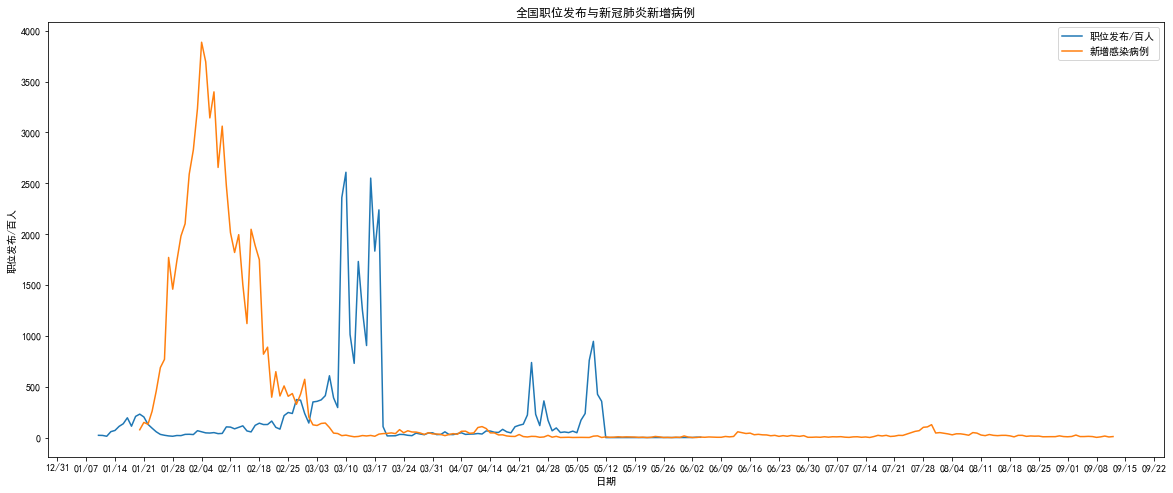

In [6]:
#绘制折线图
fig = plt.figure(figsize=(20, 8))
ax = fig.add_subplot(1, 1, 1)

plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%m/%d'))  #設置x軸主刻度顯示格式（日期）
plt.gca().xaxis.set_major_locator(mdates.DayLocator(interval=7))  #設置x軸主刻度間距

plt.xlabel('日期')
plt.ylabel('职位发布/百人')
plt.title('全国职位发布与新冠肺炎新增病例')
plt.plot(job_counts["Date"],job_counts["counts"]/100,label = "职位发布/百人")
plt.plot(df_nn['Date'],df_nn['new_case'],label = "新增感染病例")
plt.legend()
plt.show()

In [7]:
#导入武汉疫情情况
wh_covid =pd.read_excel(r"D:\BaiduNetdiskDownload\长风网\新冠疫情数据集\疫情数据1\分城市疫情数据\CityTS.7.3.xlsx")
wh_covid = wh_covid[wh_covid["省市名称"].isin(["武汉"])]
wh_covid["确诊差分"] = wh_covid["确诊人数"].diff()
wh_covid.head(1)

,省市名称,日期,确诊人数,治愈人数,死亡人数,密切接触者人数（累计）,医学观察人数（正在）,临床诊断人数,临床诊断治愈人数,临床诊断死亡人数,境外输入确诊人数,境外输入治愈人数,境外输入死亡人数,确诊差分
4105,武汉,2020-01-28,1905.0,NaN,104.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [8]:
#提取武汉的情况
df_wuhan = dc[dc["job_big_place"].isin(["武汉"])]# 提取具有莫一项的情况

In [9]:
# 将武汉情况
wuhan_jc = df_wuhan['Date'].value_counts().to_frame().reset_index()
wuhan_jc.columns = ['Date','counts']
wuhan_jc = wuhan_jc.sort_values(by = 'Date')
wuhan_jc['Date'] = pd.to_datetime(wuhan_jc['Date'])#转化为daytime格式

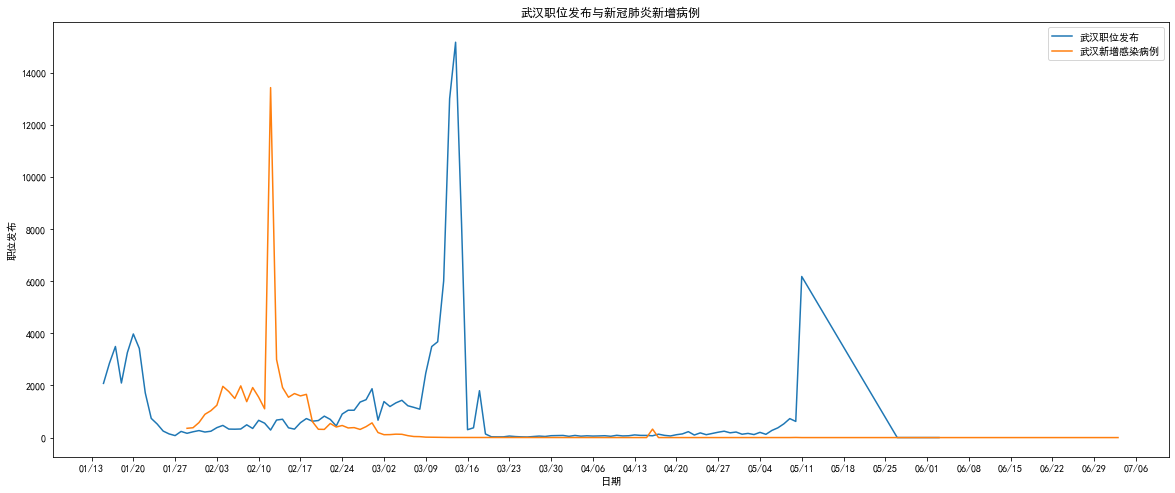

In [10]:
#武汉的职位发布和疫情对比
fig = plt.figure(figsize=(20, 8))
ax = fig.add_subplot(1, 1, 1)

plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%m/%d'))  #設置x軸主刻度顯示格式（日期）
plt.gca().xaxis.set_major_locator(mdates.DayLocator(interval=7))  #設置x軸主刻度間距

plt.xlabel('日期')
plt.ylabel('职位发布')
plt.title('武汉职位发布与新冠肺炎新增病例')

plt.plot(wuhan_jc["Date"],wuhan_jc["counts"],label = "武汉职位发布" )
plt.plot(wh_covid['日期'],wh_covid['确诊差分'],label = "武汉新增感染病例")

plt.legend()
plt.show()

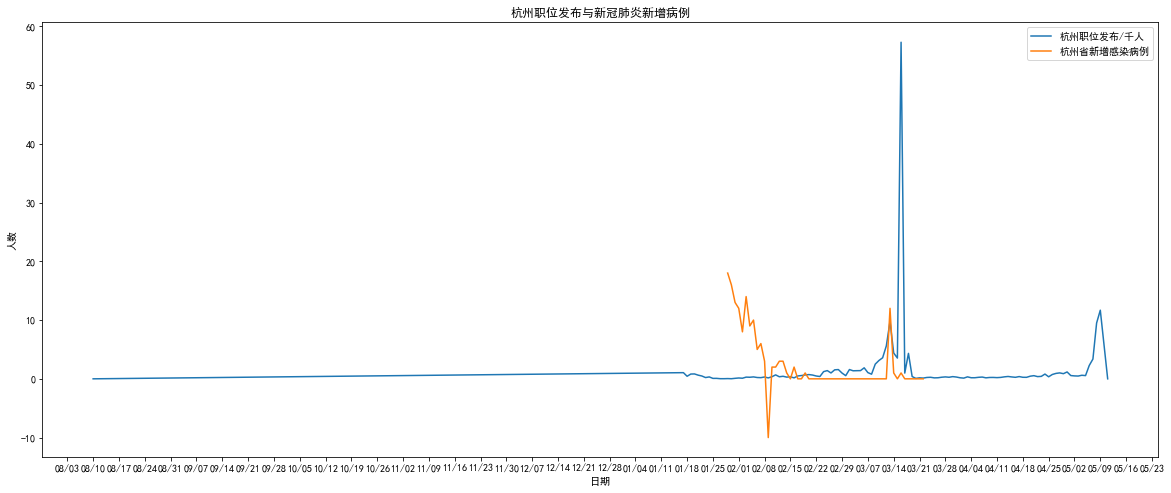

In [33]:
#导入杭州疫情情况
hz_covid =pd.read_excel(r"D:\BaiduNetdiskDownload\长风网\新冠疫情数据集\疫情数据1\分城市疫情数据\CityTS.7.3.xlsx")
hz_covid = hz_covid[hz_covid["省市名称"].isin(["杭州"])]
hz_covid["确诊差分"] = hz_covid["确诊人数"].diff()
#提取杭州的情况
df_hz = dc[dc["job_big_place"].isin(["杭州"])]# 提取具有莫一项的情况
hz_jc = df_hz['Date'].value_counts().to_frame().reset_index()
hz_jc.columns = ['Date','counts']
hz_jc = hz_jc.sort_values(by = 'Date')
hz_jc['Date'] = pd.to_datetime(hz_jc['Date'])#转化为daytime格式
#杭州的职位发布和疫情对比
fig = plt.figure(figsize=(20, 8))
ax = fig.add_subplot(1, 1, 1)

plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%m/%d'))  #設置x軸主刻度顯示格式（日期）
plt.gca().xaxis.set_major_locator(mdates.DayLocator(interval=7))  #設置x軸主刻度間距

plt.xlabel('日期')
plt.ylabel('人数')
plt.title('杭州职位发布与新冠肺炎新增病例')

plt.plot(hz_jc["Date"],hz_jc["counts"]/1000,label = "杭州职位发布/千人" )
plt.plot(hz_covid['日期'],hz_covid['确诊差分'],label = "杭州省新增感染病例")

plt.legend()
plt.show()

In [ ]:
#导入杭州疫情情况
bj_covid =pd.read_excel(r"D:\BaiduNetdiskDownload\长风网\新冠疫情数据集\疫情数据1\分城市疫情数据\CityTS.7.3.xlsx")
bj_covid = bj_covid[hz_covid["省市名称"].isin([""])]
hz_covid["确诊差分"] = hz_covid["确诊人数"].diff()
#提取杭州的情况
df_hz = dc[dc["job_big_place"].isin(["杭州"])]# 提取具有莫一项的情况
hz_jc = df_hz['Date'].value_counts().to_frame().reset_index()
hz_jc.columns = ['Date','counts']
hz_jc = hz_jc.sort_values(by = 'Date')
hz_jc['Date'] = pd.to_datetime(hz_jc['Date'])#转化为daytime格式
#杭州的职位发布和疫情对比
fig = plt.figure(figsize=(20, 8))
ax = fig.add_subplot(1, 1, 1)

plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%m/%d'))  #設置x軸主刻度顯示格式（日期）
plt.gca().xaxis.set_major_locator(mdates.DayLocator(interval=7))  #設置x軸主刻度間距

plt.xlabel('日期')
plt.ylabel('人数')
plt.title('杭州职位发布与新冠肺炎新增病例')

plt.plot(hz_jc["Date"],hz_jc["counts"]/1000,label = "杭州职位发布/千人" )
plt.plot(hz_covid['日期'],hz_covid['确诊差分'],label = "杭州省新增感染病例")

plt.legend()
plt.show()

In [20]:
sc = dc.groupby("Date").size()

In [22]:
sc2 = dc.groupby("job_big_place").size()

In [23]:
top30_city = sc2.sort_values(ascending = False).head(30)

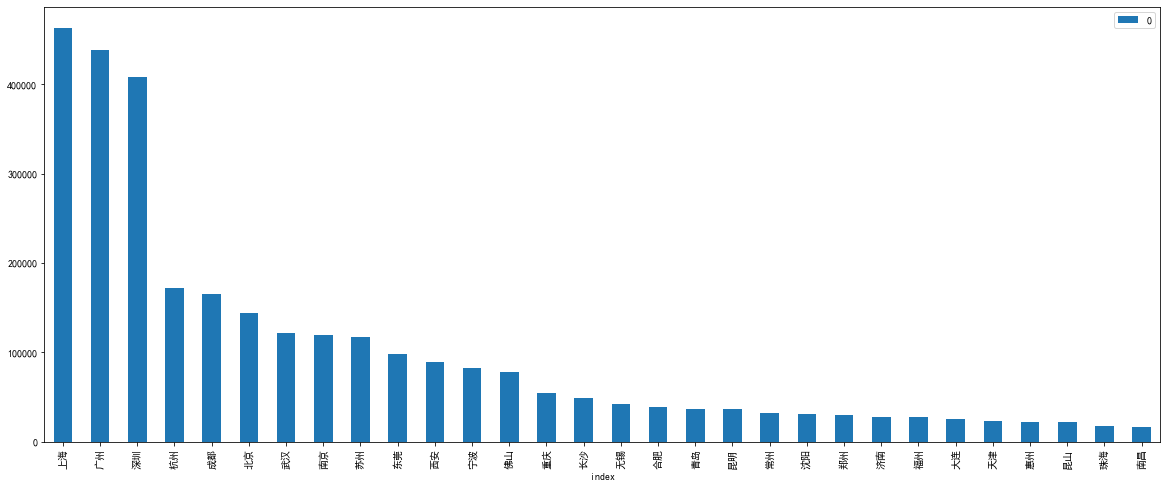

In [24]:
df = top30_city.to_frame()
column = df.columns[0]
df['index'] = df.index.tolist()
df.plot.bar(x='index', y=column,figsize=[20,8])
plt.show()

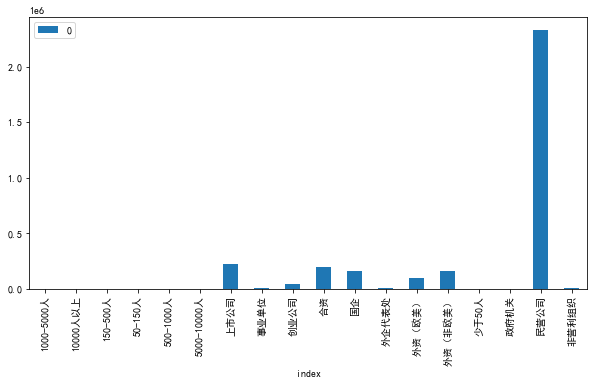

In [28]:
sc3 =  dc.groupby("comp_type").size()
df = sc3.to_frame()
column = df.columns[0]
df['index'] = df.index.tolist()
df.plot.bar(x='index', y=column,figsize=[10,5])
plt.show()

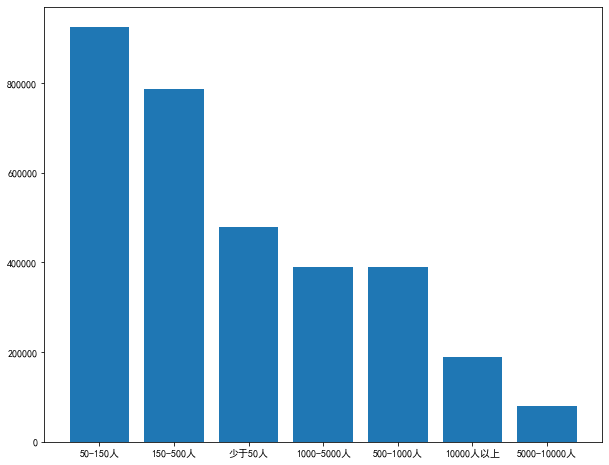

In [52]:
#不同人数的招聘数据
person = dc['comp_persion_num'].value_counts().to_frame().reset_index()
fig = plt.figure(figsize=(10,8))
plt.bar(person["index"],person["comp_persion_num"])
plt.show()

In [55]:
job_keyword = dc.job_keyword.value_counts().to_frame().reset_index()

In [57]:
# 分词处理
import jieba 
def texExtraction(s,words):  
    for inedx,value in s.iteritems():  
        words += str(value)  
    return words  

words_1 = ""
words_1 = texExtraction(job_keyword,words_1) 
fh = open('job_keyword.txt', 'w', encoding='utf-8')  
fh.write(words_1)  
fh.close() 

In [66]:
import jieba  
from collections import Counter  
from wordcloud import WordCloud  
import matplotlib.pyplot as plt  
from PIL import Image  
import numpy as np  
import jieba.analyse  
from pyquery import PyQuery  
import csv  

#写入第一季度数据  
mytext = open('job_keyword.txt', 'r', encoding='utf-8').read()   
# 创建停用词list  
def stopwordslist(filepath):  
    stopwords = [line.strip() for line in open(filepath, 'r', encoding='GBK').readlines()]  
    return stopwords  
  
# 对句子去除停用词  
def movestopwords(sentence):  
    stopwords = stopwordslist('./stop_words.txt')  # 这里加载停用词的路径  
    words =[x for x in sentence if len(x) >1 and x not in stopwords]  
    return words  
  
def main():  
    words = jieba.cut(PyQuery(mytext).text()) #去除HTML标签  
    word_list = movestopwords(words) # 去除停用词  
    words_split = " ".join(word_list) #列表解析为字符串  
  
    print('tf-tdf算法，写入csv-------------------------------------------------')  
    keywords_tf = jieba.analyse.extract_tags(words_split, topK=100, withWeight=True,allowPOS=('ns', 'n', 'vn', 'v')) # tf-tdf算法  
    f = open('result/job_keyword_tf_tdf_top100.csv','w',encoding = 'utf-8',newline='')  
    csv_writer = csv.writer(f)  
    csv_writer.writerow(["词语","td-idf"])  
    for item in keywords_tf:  
         csv_writer.writerow([item[0],item[1]])  
         #print(item[0],item[1])   
        
    print('textrank算法,写入csv-------------------------------------------------')  
    keywords_rank = jieba.analyse.textrank(words_split, topK=100, withWeight=True,allowPOS=('ns', 'n', 'vn', 'v')) #textrank算法  
    f = open('result/job_keyword_text_rank_top100.csv','w',encoding = 'utf-8',newline='')  
    csv_writer = csv.writer(f)  
    csv_writer.writerow(["词语","textrank"])  
    for item in keywords_rank:  
        csv_writer.writerow([item[0],item[1]])  
       
    print('将纯词频统计写入-------------------------------------------------')  
    mycount = Counter(word_list) # 统计词频  
    f = open('result/quarter1_frquency.csv','w',encoding = 'utf-8',newline='')  
    csv_writer = csv.writer(f)  
    csv_writer.writerow(["词语","词频"])  
    for key, val in mycount.most_common(100):  # 有序（返回前100个）  
        csv_writer.writerow([key,val])  
if __name__ == '__main__':  
    main()  
  
    
    


tf-tdf算法，写入csv-------------------------------------------------
textrank算法,写入csv-------------------------------------------------
将纯词频统计写入-------------------------------------------------


In [67]:
key = pd.read_csv(r"C:\Users\ling1\Desktop\物流招聘\result\job_keyword_text_rank_top100.csv")

In [77]:
dc_d.head(1)

,id,job_title,job_big_place,job_letter_place,job_salary,job_pub_time,job_type,job_exp,job_need_num,job_edu,job_keyword,comp_name,comp_type,comp_persion_num,comp_industry,comp_address,job_welfare,job_desc,Date
0,0,采购助理,武汉,江汉区,4.5-6千/月,2020-03-09,采购助理,2年经验,招2人,NaN,医药采购,同仁堂连锁大药房,国企,150-500人,制药/生物工程|批发/零售,迎宾路口维多利亚大厦底商(邮编：065201),NaN,岗位职责：1、协助采购经理进行采购方面的工作；2、管理采购合同及供应商文件资料，建立供应商信...,2020-03-09


In [72]:
dc_d = dc.drop_duplicates()

In [75]:
dc_d.shape[0]

3238495

In [76]:
dc.shape[0]

3238495

In [81]:
data_list = dc_d.loc[dc_d['comp_industry'].str.contains("物流",na=False)]

In [91]:
data_list_title = dc_d.loc[dc_d['job_title'].str.contains("物流",na=False)]
data_list_title.shape[0]

27783

In [94]:
def findStringInCol(df,col,findString):
    data_list_title = df.loc[df['col'].str.contains("findString",na=False)]
    return data_list_title.shape[0]

In [85]:
data_list.head(1)

,id,job_title,job_big_place,job_letter_place,job_salary,job_pub_time,job_type,job_exp,job_need_num,job_edu,job_keyword,comp_name,comp_type,comp_persion_num,comp_industry,comp_address,job_welfare,job_desc,Date
2,2,铁路运输销售专员,厦门,NaN,0.5-1万/月,2020-03-05,销售工程师销售代表,2年经验,招若干人,大专,销售/业务/货代/物流,广州西铁国际货运代理有限公司,外资（非欧美）,50-150人,交通/运输/物流,广州市天河区珠江新城金穗路62号侨鑫国际金融中心22层01单元(邮编：510623),周末双休/带薪年假/五险一金/绩效奖金,"工作职责：1．开拓新客户和维护现有客户2．拜访客人,商谈，建议,报价等3．出货流程规划,跟进...",2020-03-05


In [83]:
#company_industry 中包含物流的数据量
data_list.shape[0]

102037

In [87]:
data_list_waimao = dc_d.loc[dc_d['comp_industry'].str.contains("贸易",na=False)]
data_list_waimao.shape[0]

234206

In [89]:
dc_d["comp_industry"].value_counts()

教育/培训/院校                  115025
电子技术/半导体/集成电路             103411
互联网/电子商务                  101828
建筑/建材/工程                   95947
房地产                        94775
                           ...  
公关/市场推广/会展|法律                  1
航天/航空|金融/投资/证券                 1
家居/室内设计/装潢|石油/化工/矿产/地质         1
新能源|文字媒体/出版                    1
办公用品及设备|电气/电力/水利               1
Name: comp_industry, Length: 2721, dtype: int64

In [43]:
import numpy as np
import pandas as pd
from sklearn.cluster import KMeans
from sklearn import metrics
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
%matplotlib inline

# 数据准备
X = dc["comp_persion_num"]
y 

#设置聚类数量
n_clusters = 2

# 建立聚类模型对象
kmeans = KMeans(n_clusters=n_clusters, random_state=2018)
# 训练聚类模型
kmeans.fit(X)

# 预测聚类模型
pre_y = kmeans.predict(X)

### 模型效果指标评估 ###
# 样本距离最近的聚类中心的总和
inertias = kmeans.inertia_

# 调整后的兰德指数
adjusted_rand_s = metrics.adjusted_rand_score(y, pre_y)

# 互信息
mutual_info_s = metrics.mutual_info_score(y, pre_y)

# 调整后的互信息
adjusted_mutual_info_s = metrics.adjusted_mutual_info_score(y, pre_y)

# 同质化得分
homogeneity_s = metrics.homogeneity_score(y, pre_y)

# 完整性得分
completeness_s = metrics.completeness_score(y, pre_y)

# V-measure得分
v_measure_s = metrics.v_measure_score(y, pre_y)

# 平均轮廓系数
silhouette_s = metrics.silhouette_score(X, pre_y, metric='euclidean')

# Calinski 和 Harabaz 得分
calinski_harabaz_s = metrics.calinski_harabaz_score(X, pre_y)

df_metrics = pd.DataFrame([[inertias, adjusted_rand_s,mutual_info_s, adjusted_mutual_info_s, homogeneity_s,completeness_s,v_measure_s, silhouette_s ,calinski_harabaz_s]],
                         columns=['ine','tARI','tMI','tAMI','thomo','tcomp','tv_m','tsilh','tc&h'])

df_metrics

ValueError: could not convert string to float: '150-500人'

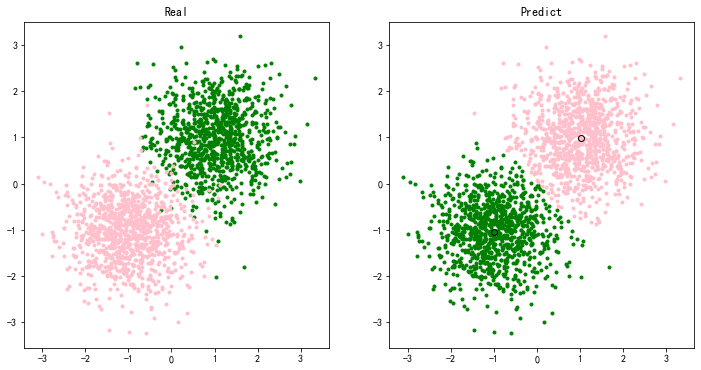

In [35]:
## 模型可视化##
centers = kmeans.cluster_centers_
# 颜色设置
colors = ['green', 'pink']
# 创建画布
plt.figure(figsize=(12,6))
titles = ['Real', 'Predict']
for j, y_ in enumerate([y, pre_y]):
    plt.subplot(1,2, j+1)
    plt.title(titles[j])
    # 循环读类别
    for i in range(n_clusters):
        # 找到相同的索引
        index_sets = np.where(y_ == i)
        # 将相同类的数据划分为一个聚类子集
        cluster = X[index_sets]
        # 展示样本点
        plt.scatter(cluster[:, 0], cluster[:, 1], c=colors[i], marker='.')
        if j==1:          
        # 簇中心
            plt.plot(centers[i][0], centers[i][1], 'o',markerfacecolor=colors[i],markeredgecolor='k', markersize=6)
plt.savefig('xx.png')
plt.show()